In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

sns.set(style="whitegrid", rc={"lines.linewidth": 4})
plt.rcParams.update({'axes.labelsize': 13.5})

In [2]:
def saveFigure(figure, name):
    fig = figure.get_figure()
    fig.savefig(f'../imagenes/matrizConfusion/{name}.png', dpi=200, bbox_inches='tight')

In [3]:
df = pd.read_csv('../data/datasets/cleanDataConfig.csv', sep=';')
df.head()

,id_leg,operation,runway,hexid,callsign,type,origin,destination,altitude,ground_speed,...,runway_14R,runway_18L,runway_18R,runway_32L,runway_32R,runway_36L,runway_36R,configuration_NORTE,configuration_SUR,configuration
0,733513,0,5,483,6920,22,186,268,1625.0,142.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0
1,733498,0,5,515,246,23,664,268,1850.0,137.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0
2,733495,0,5,814,262,67,212,268,2200.0,156.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0
3,733501,0,5,625,277,23,254,268,1862.5,143.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0
4,733496,0,5,491,268,23,421,268,2000.0,136.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0


In [4]:
df.shape

(733822, 41)

In [5]:
columns_names = df.columns.to_list()

predictors = columns_names[:38]

target = columns_names[-1]

X = df[predictors]

Y = df[target]

In [6]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.2, shuffle=True, random_state=0)

In [7]:
forest = joblib.load('../models/RANDOM_FOREST.bin')
knn = joblib.load('../models/KNN.bin')
rrnn = joblib.load('../models/RRNN.bin')
voting_clasifier = joblib.load('../models/votingClasifier.bin')

In [8]:
forest_cm = confusion_matrix(y_true=Y_test, y_pred=forest.predict(X_test))
knn_cm = confusion_matrix(y_true=Y_test, y_pred=knn.predict(X_test))
rrnn_cm = confusion_matrix(y_true=Y_test, y_pred=rrnn.predict(X_test))
voting_clasifier_cm = confusion_matrix(y_true=Y_test, y_pred=voting_clasifier.predict(X_test))

In [9]:
def generate_metrics(confusion_matrix):
    vp, vn, fp, fn = confusion_matrix[0][0], confusion_matrix[1][1], confusion_matrix[1][0], confusion_matrix[0][1]
    
    accuracy = (vp + vn) / (vp + vn + fp + fn)
    precision = (vp) / (vp + fp)
    recall = (vp) / (vp + fn)
    f1 = 2 * ((precision * recall) / (precision + recall))
    
    print(f"Precision: {round(precision * 100 , 5)}%")
    print(f"Recall: {round(recall * 100 , 5)}%")
    print(f"F1: {round(f1 * 100 , 5)}%")

In [10]:
print("Bosques Aleatorios:")
generate_metrics(forest_cm)
print('======================================')
print("K-Vecinos Cercanos:")
generate_metrics(knn_cm)
print('======================================')
print("Redes Neuronales:")
generate_metrics(rrnn_cm)
print('======================================')
print("Clasificación por Votación:")
generate_metrics(voting_clasifier_cm)
print('======================================')

Bosques Aleatorios:
Precision: 99.54236%
Recall: 99.46635%
F1: 99.50434%
K-Vecinos Cercanos:
Precision: 95.17924%
Recall: 93.69654%
F1: 94.43207%
Redes Neuronales:
Precision: 93.41814%
Recall: 93.00916%
F1: 93.2132%
Clasificación por Votación:
Precision: 99.68208%
Recall: 99.53905%
F1: 99.61051%


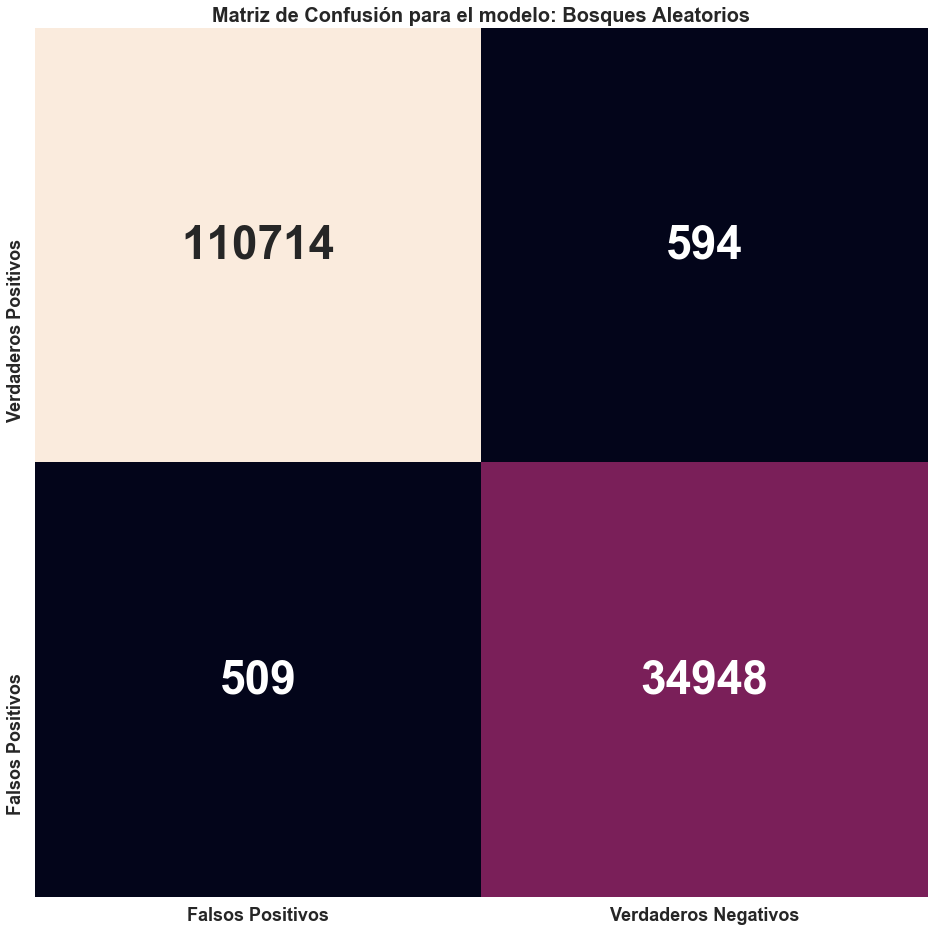

In [11]:
plt.figure(figsize=(16, 16))

sns_plot = sns.heatmap(forest_cm, annot=True, fmt="d", cbar=False, annot_kws={"fontsize":46, "weight": "bold"})

plt.title('Matriz de Confusión para el modelo: Bosques Aleatorios', fontsize=20, weight = "bold")
sns_plot.set_xticklabels(['Falsos Positivos', 'Verdaderos Negativos'], fontsize = 18, weight = "bold")
sns_plot.set_yticklabels(['Verdaderos Positivos', 'Falsos Positivos'], fontsize = 18, weight = "bold")

plt.show()

saveFigure(sns_plot, "RandomForest_ConfusionMatrix")

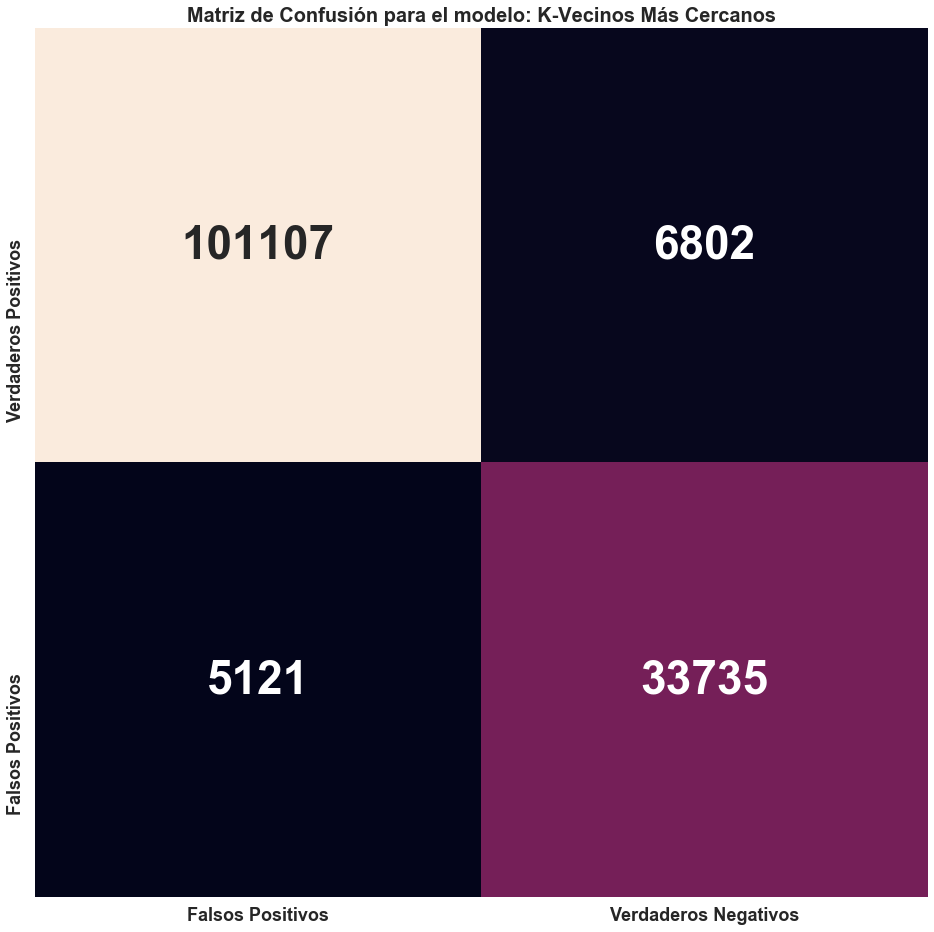

In [12]:
plt.figure(figsize=(16, 16))
sns_plot = sns.heatmap(knn_cm, annot=True, fmt="d", cbar=False, annot_kws={"fontsize":46, "weight": "bold"})

plt.title('Matriz de Confusión para el modelo: K-Vecinos Más Cercanos', fontsize=20, weight = "bold")
sns_plot.set_xticklabels(['Falsos Positivos', 'Verdaderos Negativos'], fontsize = 18, weight = "bold")
sns_plot.set_yticklabels(['Verdaderos Positivos', 'Falsos Positivos'], fontsize = 18, weight = "bold")

plt.show()

saveFigure(sns_plot, "KNN_ConfusionMatrix")

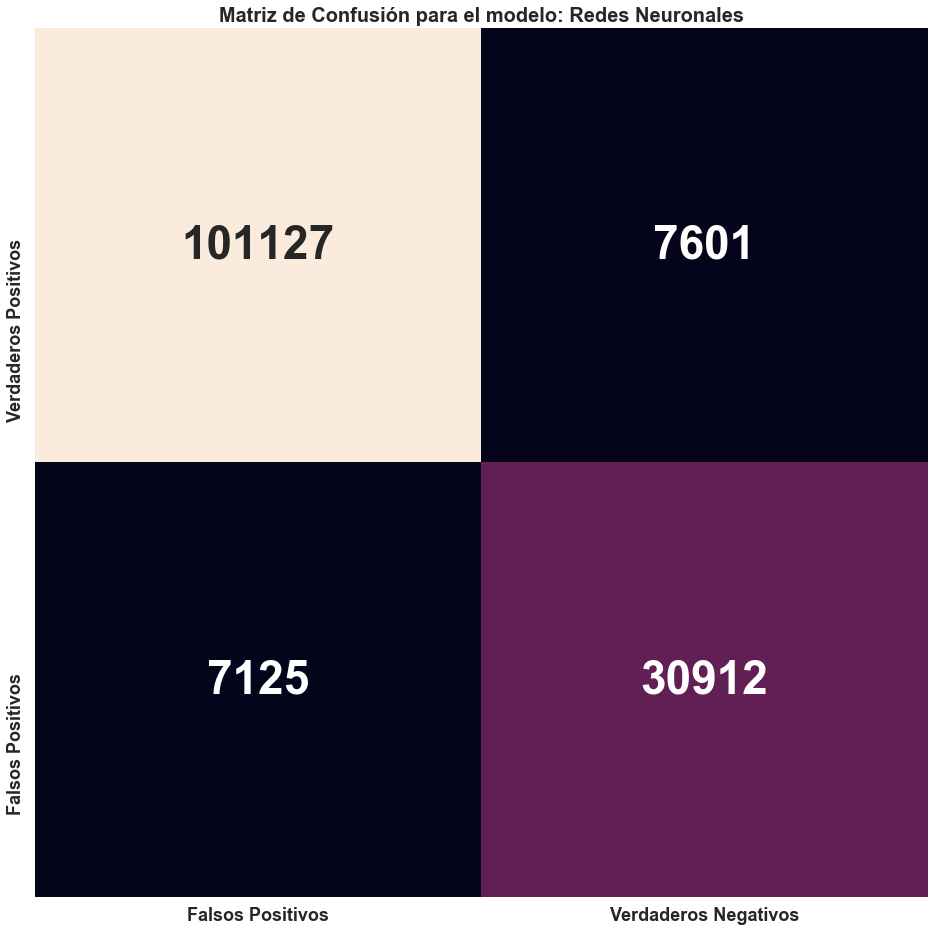

In [13]:
plt.figure(figsize=(16, 16))

sns_plot = sns.heatmap(rrnn_cm, annot=True, fmt="d", cbar=False, annot_kws={"fontsize":46, "weight": "bold"})

plt.title('Matriz de Confusión para el modelo: Redes Neuronales', fontsize=20, weight = "bold")
sns_plot.set_xticklabels(['Falsos Positivos', 'Verdaderos Negativos'], fontsize = 18, weight = "bold")
sns_plot.set_yticklabels(['Verdaderos Positivos', 'Falsos Positivos'], fontsize = 18, weight = "bold")

plt.show()
saveFigure(sns_plot, "RRNN_ConfusionMatrix")

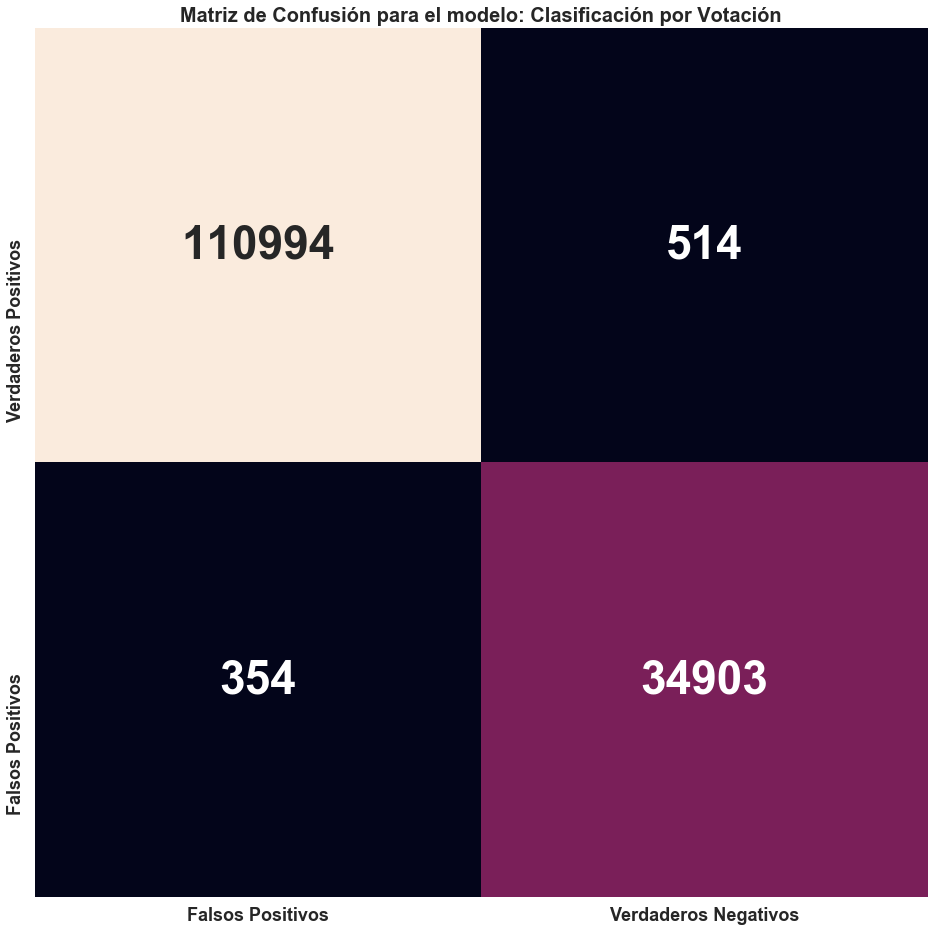

In [14]:
plt.figure(figsize=(16, 16))

sns_plot = sns.heatmap(final_model_cm_soft, annot=True, fmt="d", cbar=False, annot_kws={"fontsize":46, "weight": "bold"})

plt.title('Matriz de Confusión para el modelo: Clasificación por Votación', fontsize=20, weight = "bold")
sns_plot.set_xticklabels(['Falsos Positivos', 'Verdaderos Negativos'], fontsize = 18, weight = "bold")
sns_plot.set_yticklabels(['Verdaderos Positivos', 'Falsos Positivos'], fontsize = 18, weight = "bold")

plt.show()
saveFigure(sns_plot, "Ensemble_ConfusionMatrix")